# Load Imports and Data

In [1]:
from model.model import *
from preprocess import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


# Preprocess Data
Preprocess data using the preprocessing function and split into train and test sets. Verbosity sets whether or not to print out at the end

In [40]:
dfs = preprocess(alldat, verbose = True)
train, test = train_test_split(dfs)

[float64]   	session             	session number, indexed 0 - 38
[object]   	session_type        	session type, train / test
[object]   	mouse_name          	name of the mouse
[float64]   	trial_number        	trial number, indexed 0 to num_trials
[bool]   	go_trial            	true if go_trial, false if no-go trial
[float64]   	gocue               	time of go cue, in ms
[float64]   	response_time       	time of response, in ms
[float64]   	latency             	response time - go cue, in ms
[float64]   	mouse_resp          	mouse response for a given trial
[object]   	wheel_velocity      	velocity of the wheel
[object]   	wheel_acceleration  	acceleration of the wheel (first derivative of velocity)
[float64]   	feedback_onset      	feedback onset (reward or punishment)
[float64]   	feedback_type       	-1 if punish, 0 if none, 1 if reward
[float64]   	contrast_left       	left contrast
[float64]   	contrast_right      	right contrast
[float64]   	contrast_diff       	contrast left - co

In [4]:
train.head()

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,pres_difficulty,pres_acc,delta_response_time,past_acc,past_latency,past_difficulty,fut_go_trial,fut_acc,fut_latency,fut_difficulty
0,0.0,train,Cori,0.0,True,1027.216250,1150.203633,122.987383,1.0,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,0.0,1,0.249299,NaN,NaN,NaN,True,1.0,525.089054,0.5
1,0.0,train,Cori,1.0,True,874.413814,1399.502868,525.089054,-1.0,"[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...",...,0.5,1,-0.450212,1.0,122.987383,0.0,True,1.0,124.078016,0.5
2,0.0,train,Cori,2.0,True,825.213029,949.291045,124.078016,1.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0...",...,0.5,1,1.317511,1.0,525.089054,0.5,False,1.0,1505.189657,1.0
3,0.0,train,Cori,3.0,False,761.612015,2266.801672,1505.189657,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",...,1.0,1,-1.450026,1.0,124.078016,0.5,True,0.0,154.765410,0.5
4,0.0,train,Cori,4.0,True,662.010427,816.775837,154.765410,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,0.5,0,0.700331,1.0,1505.189657,1.0,False,0.0,330.288154,1.0


# Plot Histograms
Plot, like, everything. But not everything. Just some things.


In [80]:
import seaborn as sns
sns.set()
def histograms(df, x, by: str = '', fig:str = '', sub:str = '', filter_:dict = None, title = None):
    
    # Pull out all unique figure distinctions 
    if fig is not '':
        fig_list = sorted(set(df[fig]))
    else:
        fig_list = ['']
        
    # Pull out all unique subfigure distinctions 
    if sub is not '':
        sub_list = sorted(set(df[sub]))
    else:
        sub_list = ['']
        
    if by is not '':
        by_list = sorted(set(df[by]))
    else:
        by_list = ['']
    
    
    df.head()
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]
            
    df.head()
            
    for fig_i,fig_val in enumerate(fig_list):
        plt.figure(fig_i,figsize=(20,10));
        if fig_val is not '':
            df_fig = df[df[fig] == fig_val]
        else:
            df_fig = df
        for sub_i,sub_val in enumerate(sub_list):
            plt.subplot(np.ceil(np.sqrt(len(sub_list))), np.ceil(np.sqrt(len(sub_list))), sub_i+1)
            if sub_val is not '':
                df_sub = df_fig[df_fig[sub] == sub_val]
            else:
                df_sub = df_fig
            for by_i,by_val in enumerate(by_list):
                if by_val is not '':
                    df_by = df_sub[df_sub[by] == by_val]
                else:
                    df_by = df_sub
                try:
                    bins = 30;#int(np.round(np.ptp(df_by[x].to_numpy())/20))
                except: 
                    bins = 1

                if bins is not 0:
                    plt.hist(x = x, data = df_by, alpha = 0.5, label = "%s: %s"%(by, by_val),bins=bins)
                    plt.xlabel(x)
                    plt.legend()
                    plt.title(str(sub) + ' = ' + str(sub_val))
        plt.tight_layout()
        plt.suptitle(str(fig_val) + ' ' + str(x),fontweight='bold', fontsize=16)
        plt.subplots_adjust(top=0.90)
        plt.show()

In [81]:
train['lat_chg'] = train['latency'].diff()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
train['mode'] = 0
train['mode'][train['latency']<200] = 1
train_2 = (train['latency']>=200).to_numpy() & (train['latency']<400).to_numpy()
train['mode'][train_2] = 2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

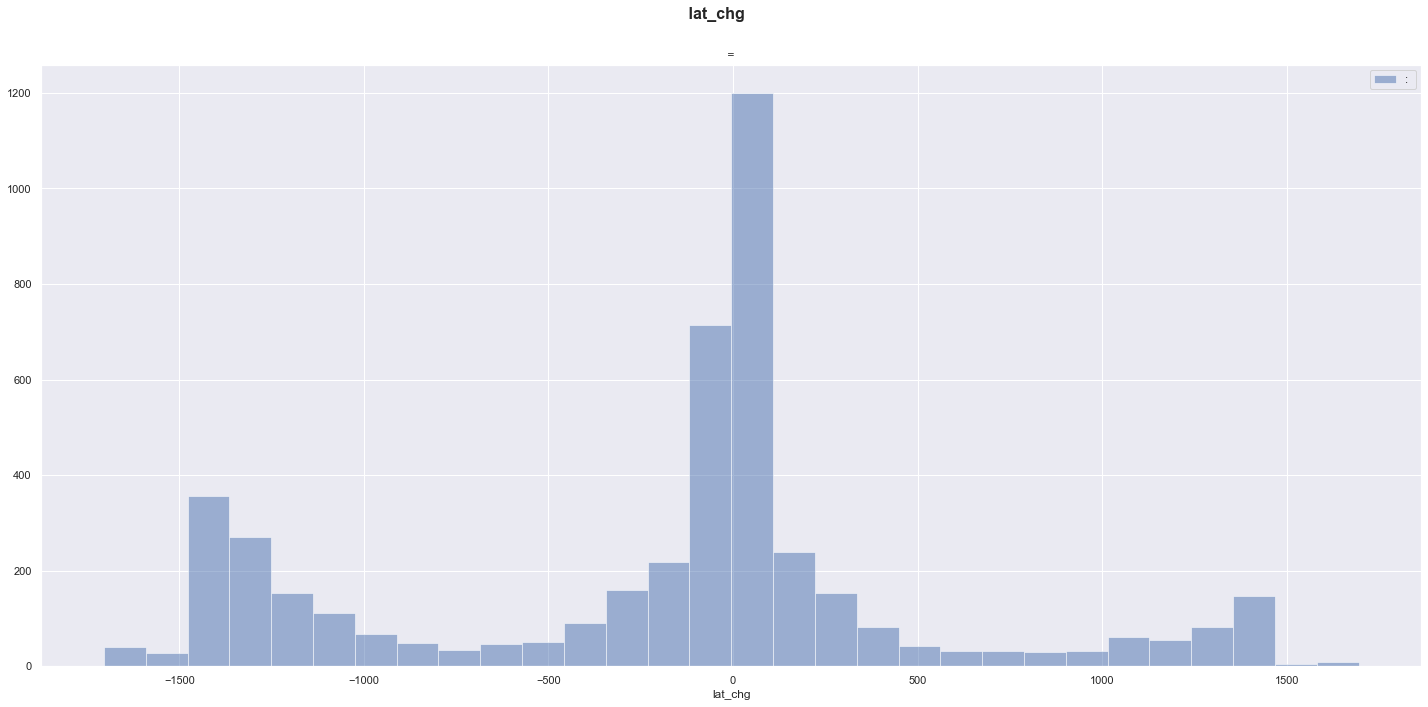

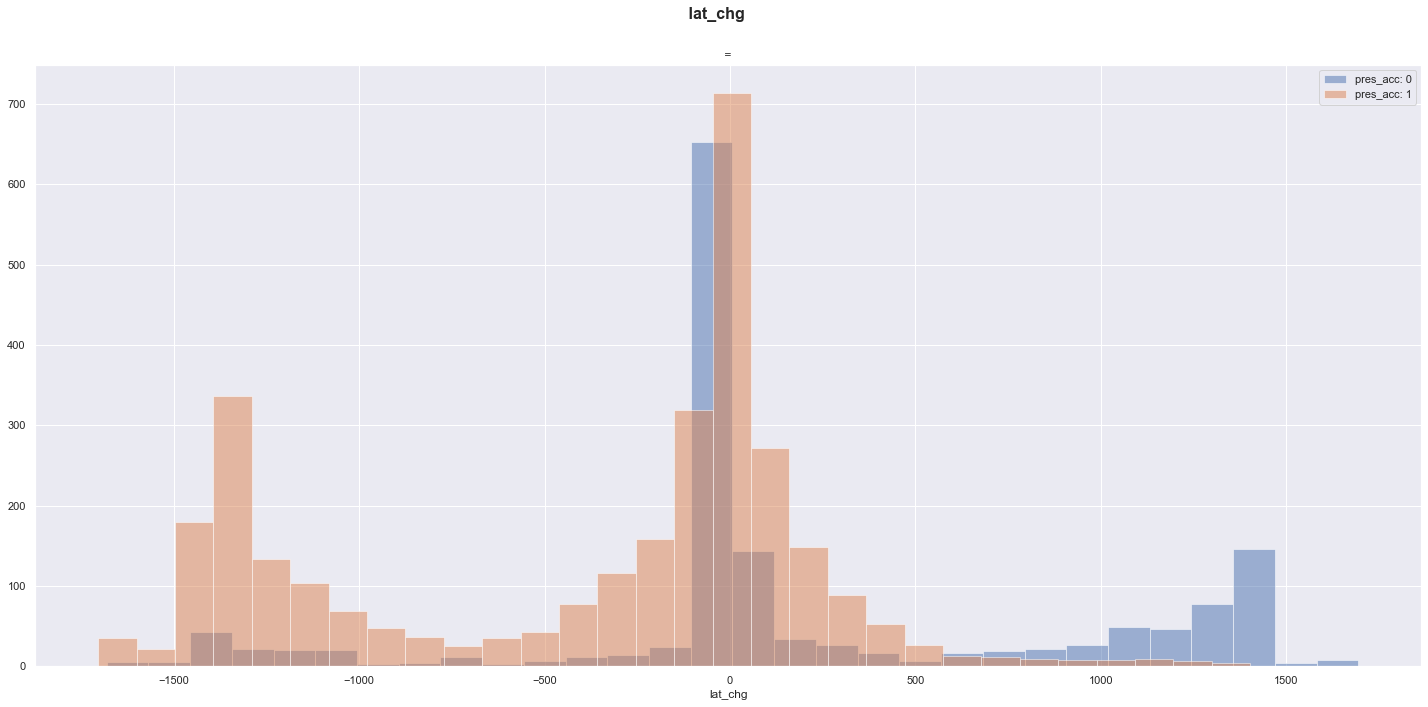

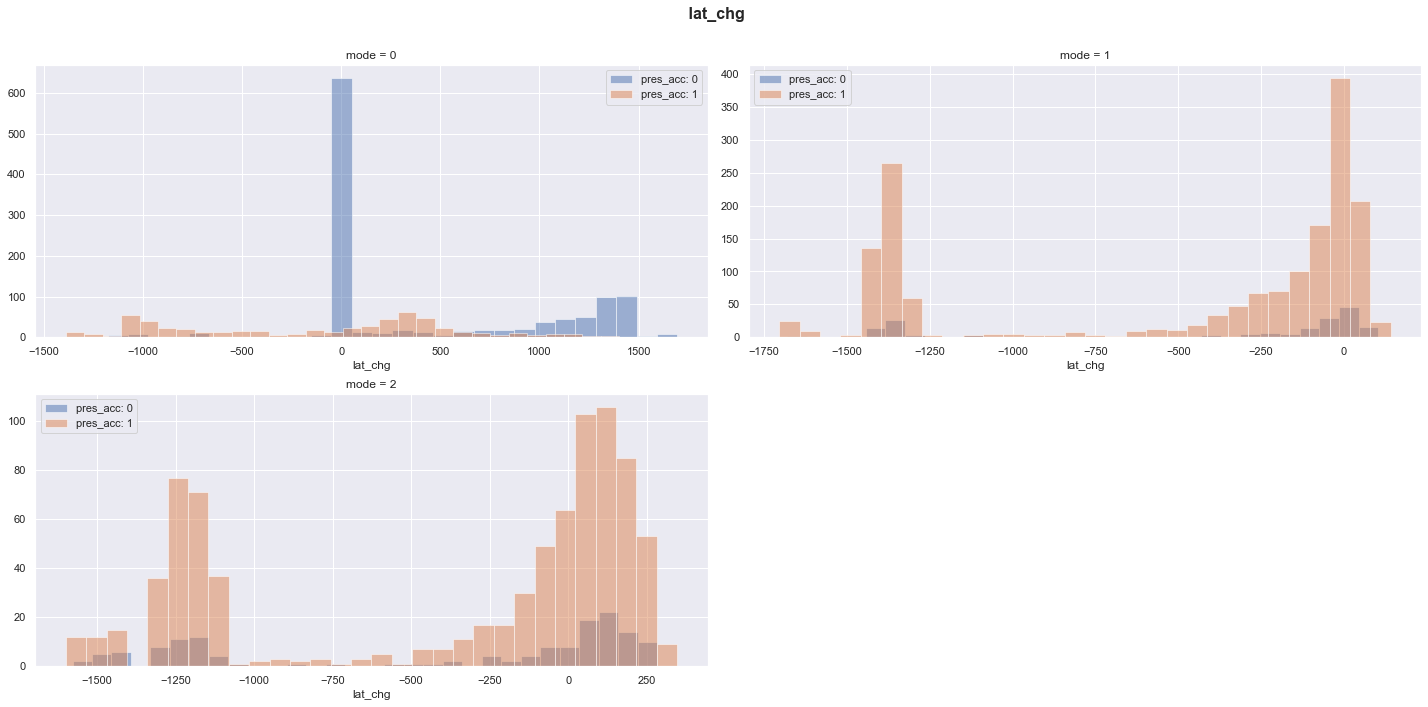

In [86]:
sns.set()
f = {"go_trial": True, "fut_go_trial": True} #,"feedback_type":1.0}
histograms(train, x="trial_number", by= "mode",filter_ = f)
histograms(train, x="trial_number", fig = "mouse_name", sub="pres_difficulty",by= "mode", filter_ = f)
# histograms(train, x="lat_chg",filter_ = f)
# histograms(train, x="lat_chg", by= "feedback_type",filter_ = f)
# histograms(train, x="lat_chg", sub="pres_difficulty",by= "feedback_type", filter_ = f)

In [15]:
train.columns

Index(['session', 'session_type', 'mouse_name', 'trial_number', 'go_trial',
       'gocue', 'response_time', 'latency', 'mouse_resp', 'wheel_velocity',
       'wheel_acceleration', 'feedback_onset', 'feedback_type',
       'contrast_left', 'contrast_right', 'contrast_diff', 'pres_difficulty',
       'pres_acc', 'delta_response_time', 'past_acc', 'past_latency',
       'past_difficulty', 'fut_go_trial', 'fut_acc', 'fut_latency',
       'fut_difficulty', 'lat_chg', 'mode'],
      dtype='object')

In [16]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    f = {"fut_difficulty": i, "go_trial": True, "fut_go_trial": True}
    plots(train, y= "pres_difficulty", features = ["wheel_acceleration"], filter_= f, hue= "mode")
    

# Model Stuff (not working)
## Features

In [17]:
df = train

In [63]:
df['pres_acc']

0        1
1        1
2        1
3        1
4        0
        ..
10045    0
10046    0
10047    0
10048    0
10049    0
Name: pres_acc, Length: 7814, dtype: int64

## Per Session Model and Analytics

In [65]:
from sklearn.metrics import mean_squared_error as mse 
from scipy.special import expit
total_time = 2 # in s
alpha = np.linspace(0,1,10)
unique_sessions = np.unique(df['session'])
mse_model = np.empty([len(alpha),len(unique_sessions)])

df['pres_conf_pred'] = 0;
df['expected_fut_acc'] = 0
df['surprise'] = 0;
df['pres_confidence'] = 1 - ((df['latency'])/total_time);
df['pres_conf_pred'][0] = df['confidence'][0];

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [73]:
for sess_ind, session in enumerate(unique_sessions):
    # Convert into trial-feature matrix
    past_confidence = confidence[:-1]
    current_confidence = confidence[1:]
    
    # -------------------------- MODEL -------------------------- 
    for a_ind,a in enumerate(alpha):
        # Compute predicted confidence
        for t, row in train.iterrows():
            df['expected_fut_acc'][t] = (1-df['fut_difficulty'][t])*df['pres_conf_pred'][t];
            df['surprise'][t] = df['fut_acc'][t] - df['expected_fut_acc'][t];
            df['pres_conf_pred'] = expit(df['pres_conf_pred'][t] + a*df['surprise'][t])
        
        print(a)
        df.dropna()
        df.head
        # -------------------------- MSE Analysis -------------------------- 
#         mse_model[a_ind,sess_ind] = mse(df['pres_confidence'], df['pres_conf_pred']);
        
    print("Session" + str(sess_ind) + " done")


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444


KeyboardInterrupt: 

## Plot the Results

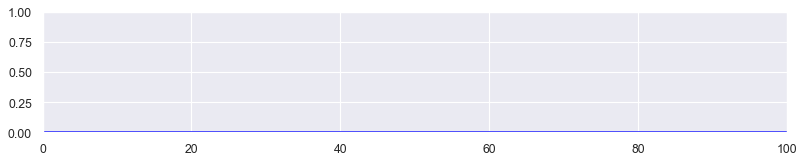

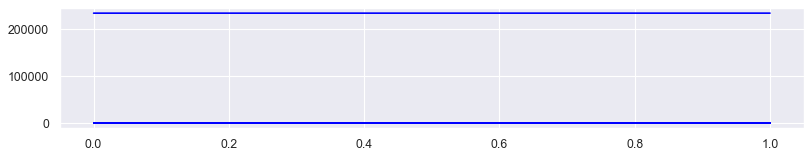

In [36]:
# Plot the model results with ground truth
plt.figure(num=1, figsize=(12, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(conf_pred,color='blue')
plt.plot(confidence,color='black')
plt.ylim([0,1]);
plt.xlim([0,100])

plt.figure(num=2, figsize=(12, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(alpha,mse_model,color='blue')